# 1) Loading the NIPS papers
<p>The  NIPS conference (Neural Information Processing Systems) is leading Machine Learning and Computational Neuroscience conference in the world where innovative work is published. The NIPS include over million research papers describing various projects in the latest technologies.<br>
<img src="Logo_for_Conference_on_Neural_Information_Processing_Systems.png" alt="The logo of NIPS (Neural Information Processing Systems)"> </p>
 
<p>For loading data, we’ll use the dataset of papers published in NIPS conference.The CSV data file contains information on the different NIPS papers that were published from 1987 until 2017 (30 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more</p>


In [1]:
# Importing modules
import pandas as pd
# Load the regular expression library
import re 
import matplotlib.pyplot
%matplotlib inline

papers = pd.read_csv('papers.csv')
papers.head(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


# 2) Preparing the data for analysis
<p>For the analysis of the papers, we are only interested in the text data associated with the paper as well as the year the paper was published in.</p>
<p>We will analyze this text data using natural language processing.  Since the file contains some metadata such as id's and file-names, it is necessary to remove all the columns that do not contain useful text information.</p>

In [2]:
# Remove the columns
papers.drop(['id','event_type', 'paper_text','pdf_name','abstract'], axis=1, inplace=True)

pd.set_option('display.max_colwidth',-1)
papers.head(10)

,year,title
0,1987,Self-Organization of Associative Database and Its Applications
1,1987,A Mean Field Theory of Layer IV of Visual Cortex and Its Application to Artificial Neural Networks
2,1988,Storing Covariance by the Associative Long-Term Potentiation and Depression of Synaptic Strengths in the Hippocampus
3,1994,Bayesian Query Construction for Neural Network Models
4,1994,"Neural Network Ensembles, Cross Validation, and Active Learning"
5,1994,Using a neural net to instantiate a deformable model
6,1994,Plasticity-Mediated Competitive Learning
7,1994,ICEG Morphology Classification using an Analogue VLSI Neural Network
8,1994,Real-Time Control of a Tokamak Plasma Using Neural Networks
9,1994,Pulsestream Synapses with Non-Volatile Analogue Amorphous-Silicon Memories


## 3) Plotting how machine learning papers have evolved over time
<p>In order to understand how the machine learning field has recently exploded in popularity, we will begin by visualizing the number of publications per year. </p>
<p>By looking at the number of published papers per year,  we can understand the extent of the machine learning 'revolution'! Typically, this significant increase in popularity is attributed to the large amounts of compute power, data and improvements in algorithms.</p>

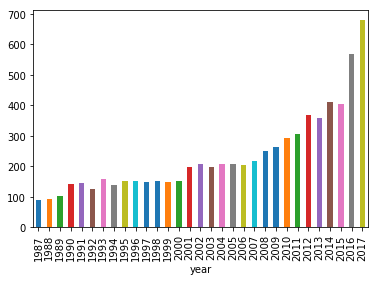

In [3]:
# Group the papers by year
groups = papers.groupby('year')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
counts.plot(kind='bar')

## 4) Preprocessing the text data
<p>Let's now analyze the titles of the different papers to identify machine learning trends. First, we will perform some simple preprocessing on the titles in order to make them more amenable for analysis. We will use a regular expression to remove any punctuation in the title. Then we will perform lowercasing. We'll then print the titles of the first rows before and after applying the modification.</p>

In [4]:
# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].str.lower()

# Print the processed titles of the first rows
papers.head(10)

,year,title,title_processed
0,1987,Self-Organization of Associative Database and Its Applications,self-organization of associative database and its applications
1,1987,A Mean Field Theory of Layer IV of Visual Cortex and Its Application to Artificial Neural Networks,a mean field theory of layer iv of visual cortex and its application to artificial neural networks
2,1988,Storing Covariance by the Associative Long-Term Potentiation and Depression of Synaptic Strengths in the Hippocampus,storing covariance by the associative long-term potentiation and depression of synaptic strengths in the hippocampus
3,1994,Bayesian Query Construction for Neural Network Models,bayesian query construction for neural network models
4,1994,"Neural Network Ensembles, Cross Validation, and Active Learning",neural network ensembles cross validation and active learning
5,1994,Using a neural net to instantiate a deformable model,using a neural net to instantiate a deformable model
6,1994,Plasticity-Mediated Competitive Learning,plasticity-mediated competitive learning
7,1994,ICEG Morphology Classification using an Analogue VLSI Neural Network,iceg morphology classification using an analogue vlsi neural network
8,1994,Real-Time Control of a Tokamak Plasma Using Neural Networks,real-time control of a tokamak plasma using neural networks
9,1994,Pulsestream Synapses with Non-Volatile Analogue Amorphous-Silicon Memories,pulsestream synapses with non-volatile analogue amorphous-silicon memories


## 5)  A word cloud to visualize the preprocessed text data
<p>In order to verify whether the preprocessing happened correctly, we can make a word cloud of the titles of the research papers. This will give us a visual representation of the most common words. Visualisation is key to understanding whether we are still on the right track! In addition, it allows us to verify whether we need additional preprocessing before further analyzing the text data.</p>
<p>Python has a massive number of open libraries! Instead of trying to develop a method to create word clouds ourselves, we'll use Andreas Mueller's <u>wordcloud library.</u></p>

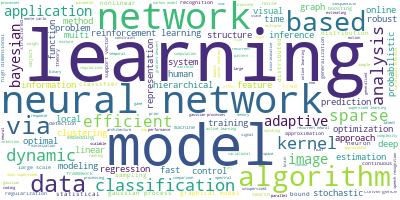

In [12]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
s = " "
long_string = s.join(papers['title_processed'])

# Create a WordCloud object
wc = wordcloud.WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wc.generate(long_string)
# Visualize the word cloud
wc.to_image()

## 6)  Prepare the text for LDA analysis
<p>The main text analysis method that we will use is latent Dirichlet allocation (LDA). LDA is able to perform topic detection on large document sets, determining what the main 'topics' are in a large unlabeled set of texts. A 'topic' is a collection of words that tend to co-occur often. The hypothesis is that LDA might be able to clarify what the different topics in the research titles are. These topics can then be used as a starting point for further analysis.</p>
<p>LDA does not work directly on text data. First, it is necessary to convert the documents into a simple vector representation. This representation will then be used by LDA to determine the topics. Each entry of a 'document vector' will correspond with the number of times a word occurred in the document. In conclusion, we will convert a list of titles into a list of vectors, all with length equal to the vocabulary. For example, <em>'Analyzing machine learning trends with neural networks.'</em> would be transformed into <code>[1, 0, 1, ..., 1, 0]</code>.</p>
<p>We'll then plot the 10 most common words based on the outcome of this operation (the list of document vectors). As a check, these words should also occur in the word cloud.</p>

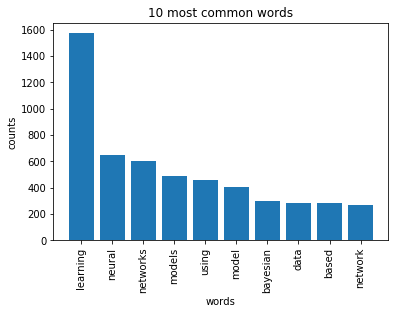

In [6]:
# Load the library with the CountVectorizer method
# CountVectorizer is use to create tokens without repeated word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = 'english')


# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


## 7) Analysing trends with LDA
<p>Finally, the research titles will be analyzed using LDA. Note that in order to process a new set of documents (e.g. news articles), a similar set of steps will be required to preprocess the data. The flow that was constructed here can thus easily be exported for a new text dataset.</p>
<p>The only parameter we will tweak is the number of topics in the LDA algorithm. Typically, one would calculate the 'perplexity' metric to determine which number of topics is best and iterate over different amounts of topics until the lowest 'perplexity' is found. For now, let's play around with a different number of topics. From there, we can distinguish what each topic is about ('neural networks', 'reinforcement learning', 'kernel methods', 'gaussian processes', etc.).</p>

In [7]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
optimization efficient variational brain kernels nonlinear model generalized adversarial estimating

Topic #1:
learning model visual probabilistic recognition structured using high multiple based

Topic #2:
inference markov algorithm functions regularization learning hidden submodular models regularized

Topic #3:
learning clustering image gradient using adaptive descent generative convolutional framework

Topic #4:
classification learning method graph convergence machine complexity propagation based matching

Topic #5:
stochastic analysis learning optimal online linear data algorithms robust approach

Topic #6:
models learning estimation bayesian fast sparse prediction matrix latent graphical

Topic #7:
multi learning selection speech spike model feature bandits memory recognition

Topic #8:
learning gaussian regression non large processes process random convex reinforcement

Topic #9:
neural networks network time deep information training recurrent co